# Enunciado

Você foi contratado por uma empresa de pesquisa para conduzir um estudo sobre o hábito de consumo de _fast-food_ entre os jovens adultos em uma determinada cidade. Sua tarefa é elaborar um plano de amostragem que garanta a representatividade dos dados coletados. Além disso, você deverá analisar os resultados da pesquisa e fornecer _insights_ sobre o comportamento de consumo de _fast-food_ nessa população.

**O que será feito?**

1. Pesquise sobre diferentes métodos de amostragem, como amostragem aleatória simples, amostragem estratificada e amostragem por conglomerados.

**Como será feito?**

1. Elabore um plano de amostragem detalhado, indicando o método escolhido e os critérios de seleção da amostra.
2. Realize a coleta de dados, seguindo o plano de amostragem elaborado.
3. Analise os dados coletados e apresente os resultados de forma clara e objetiva, destacando as principais conclusões sobre o hábito de consumo de _fast-food_ entre os jovens adultos na cidade estudada.

**O que deve ser entregue?**

1. Prepare um relatório final resumido que inclua o plano de amostragem, a descrição da metodologia de coleta de dados, os resultados da pesquisa e suas análises.

# Resolução

## Setup

In [1]:
import pandas as pd
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import os

## Simulação de base de dados

O dataset simulado pretende-se a um cadastro de pedidos de 850,000 clientes de uma rede de Fast Food de uma única cidade com uma nota de avaliação do pedido em escala Likert (1 até 4).\
Para fins de simplificação de complexidades desnecessárias, são considerados apenas todos os clientes como únicos.

- **Sexo** (str): M, F
- **Idade** (int): $[18, 61]$
- **Salário** (float): $\text{LogNormal}(\mu=3000, \sigma=0.5)$
- **Zona Residencial** (str): Norte, Sul, Leste, Oeste, Centro
- **Lanche** (str): Hamburguer, Macarrão, Pizza
- **Bebida** (str): Água, Coca-Cola, Pepsi
- **Sobremesa** (str): Sorvete de Chocolate, Sorvete de Caramelo, Fruta
- **Avaliação** (int): $[1, 4]$


In [2]:
np.random.seed(123)

# Funções auxiliares
def gen_meal() -> np.str_:
    return np.random.choice(a=['Hamburguer', 'Macarrão', 'Pizza', np.nan], p=[0.4, 0.2, 0.3, 0.1])

def gen_beverage() -> np.str_:
    return np.random.choice(a=['Água', 'Coca-cola', 'Pepsi', np.nan], p=[0.1, 0.6, 0.1, 0.2])

def gen_dessert() -> np.str_:
    return np.random.choice(a=['Sorvete de Chocolate', 'Sorvete de Caramelo', 'Fruta', np.nan], p=[0.2, 0.2, 0.1, 0.5])

In [3]:
try:
  df = pd.read_csv('Simulação - Base clientes FastFood.csv', encoding = 'UTF-8')
except FileNotFoundError:
  num_records = 850000

  def create_record() -> dict:
    global contador
    meal = gen_meal()
    beverage = gen_beverage()
    dessert = gen_dessert()

    # Garantir que pelo menos um dos itens do pedido não seja missing value
    while not meal and not beverage and not dessert:
      meal = gen_meal()
      beverage = gen_beverage()
      dessert = gen_dessert()

    return {
        'Sexo': np.random.choice(a=['M', 'F'], p=[0.6, 0.4]),
        'Idade': int(np.random.normal(loc=25, scale=3)),
        'Salário': np.random.lognormal(mean=np.log(3000), sigma=0.5),
        'Zona residencial': np.random.choice(a=['Norte', 'Sul', 'Leste', 'Oeste', 'Centro'], p=[0.3, 0.2, 0.1, 0.15, 0.25]),
        'Lanche': meal,
        'Bebida': beverage,
        'Sobremesa': dessert,
        'Avaliação': np.random.choice(a=[1,2,3,4], p=[0.15, 0.3, 0.4, 0.15])
      }

  # Base simulada
  data = [create_record() for _ in range(num_records)]
  df = pd.DataFrame(data)

  df.to_csv('Simulação - Base clientes FastFood.csv', encoding='UTF-8', index=False)
finally:
  display(df.head())

,Sexo,Idade,Salário,Zona residencial,Lanche,Bebida,Sobremesa,Avaliação
0,M,23,6850.561072,Centro,Pizza,Coca-cola,Sorvete de Caramelo,3
1,F,22,2861.247745,Sul,Macarrão,Coca-cola,Sorvete de Caramelo,3
2,M,28,3638.987517,Oeste,Hamburguer,Coca-cola,NaN,3
3,M,27,1468.544741,Norte,Pizza,Coca-cola,Sorvete de Caramelo,2
4,M,27,2750.532274,Centro,Macarrão,Coca-cola,Fruta,3


### Tratamentos

In [4]:
# Correção de tipos - Dados Categóricos
df['Sexo'] = pd.Categorical(values=df['Sexo'],
                                 categories = ['M', 'F'])
df['Avaliação'] = pd.Categorical(values=df['Avaliação'],
                                 categories = [1, 2, 3, 4],
                                 ordered = True)
df['Zona residencial'] = pd.Categorical(values=df['Zona residencial'],
                                 categories = ['Norte', 'Sul', 'Leste', 'Oeste', 'Centro'])
df['Lanche'] = pd.Categorical(values=df['Lanche'],
                              categories = ['Hamburguer', 'Macarrão', 'Pizza'])
df['Bebida'] = pd.Categorical(values=df['Bebida'],
                              categories = ['Água', 'Coca-cola', 'Pepsi'])
df['Sobremesa'] = pd.Categorical(values=df['Sobremesa'],
                                 categories = ['Sorvete de Chocolate', 'Sorvete de Caramelo', 'Fruta'])

# Ajustes ?
df['Lanche'] = df['Lanche'].astype(str)
df['Bebida'] = df['Bebida'].astype(str)
df['Sobremesa'] = df['Sobremesa'].astype(str)

### Extra - Visualização

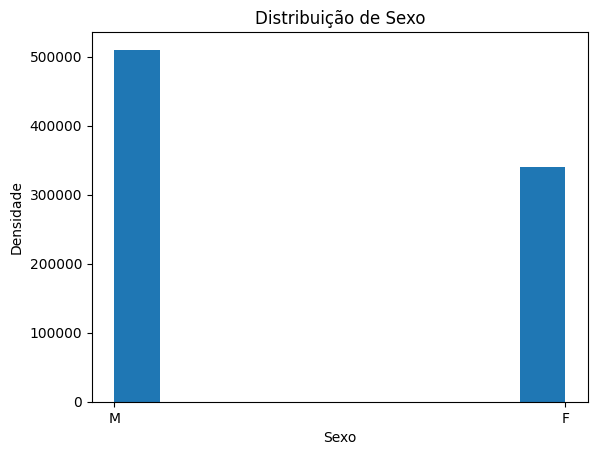

In [5]:
# Sexo

plt.hist(df['Sexo'])
plt.title('Distribuição de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Densidade')
plt.show()

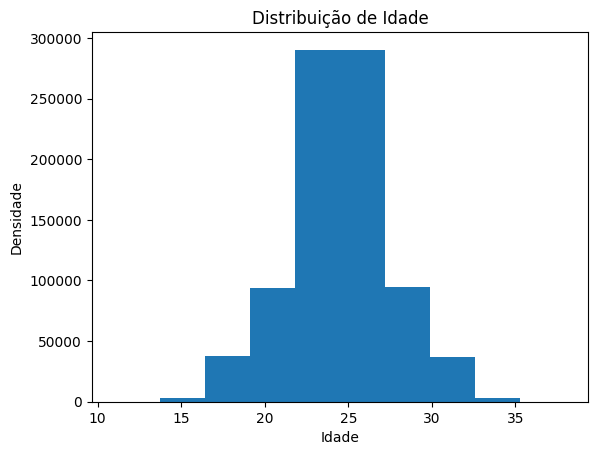

In [6]:
# Idade

plt.hist(df['Idade'])
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()

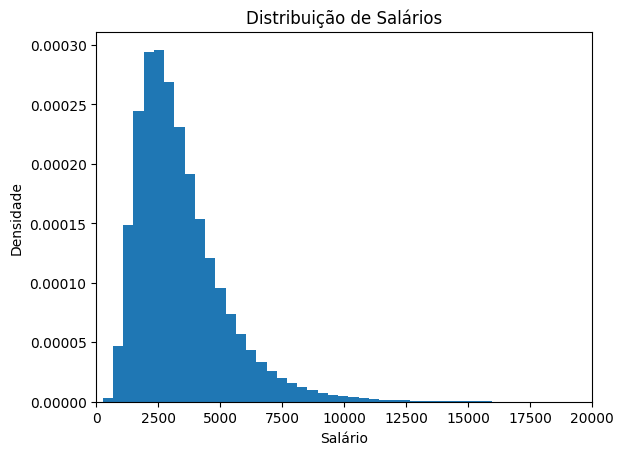

In [7]:
# Salários

plt.hist(df['Salário'], bins=100, density=True)
plt.title('Distribuição de Salários')
plt.xlabel('Salário')
plt.ylabel('Densidade')
plt.xlim(0, 20000)
plt.show()

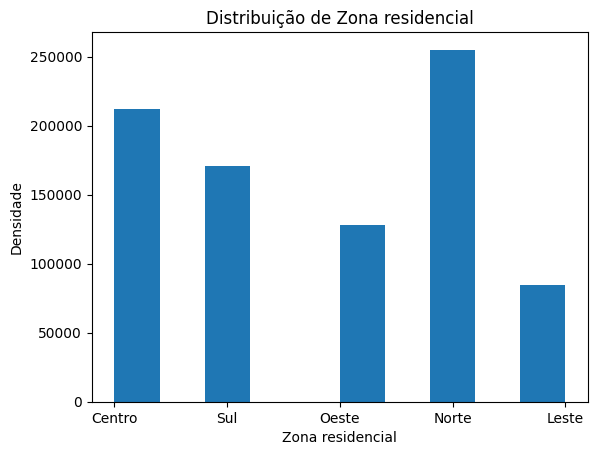

In [8]:
# Zona residencial

plt.hist(df['Zona residencial'])
plt.title('Distribuição de Zona residencial')
plt.xlabel('Zona residencial')
plt.ylabel('Densidade')
plt.show()

In [9]:
df['Lanche'].value_counts()

Lanche
Hamburguer    340396
Pizza         255396
Macarrão      169590
nan            84618
Name: count, dtype: int64

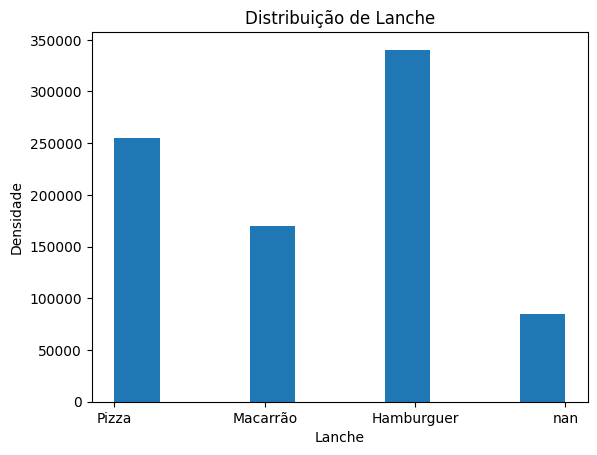

In [10]:
# Lanche

plt.hist(df['Lanche'])
plt.title('Distribuição de Lanche')
plt.xlabel('Lanche')
plt.ylabel('Densidade')
plt.show()

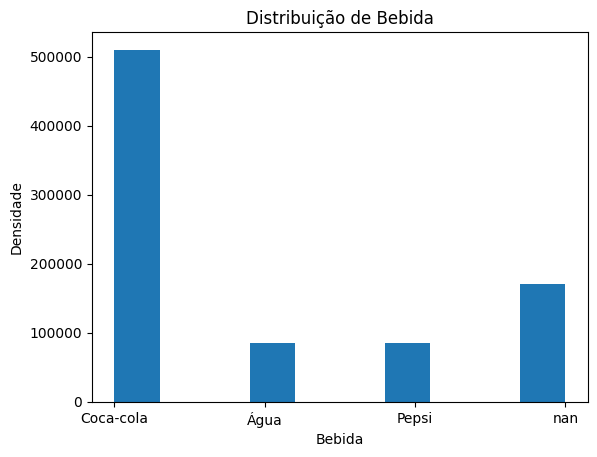

In [11]:
# Bebida

plt.hist(df['Bebida'])
plt.title('Distribuição de Bebida')
plt.xlabel('Bebida')
plt.ylabel('Densidade')
plt.show()

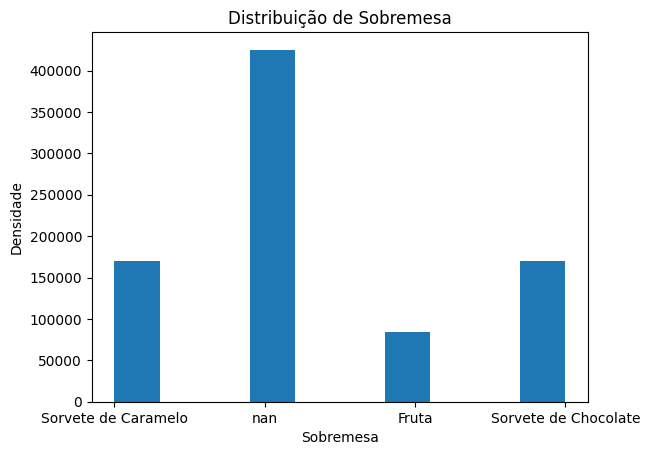

In [12]:
# Sobremesa

plt.hist(df['Sobremesa'])
plt.title('Distribuição de Sobremesa')
plt.xlabel('Sobremesa')
plt.ylabel('Densidade')
plt.show()

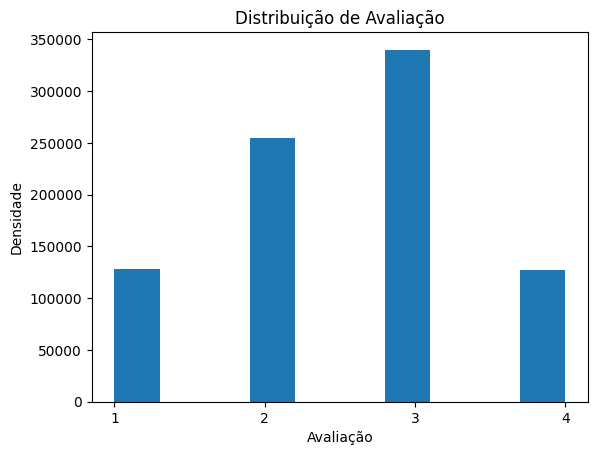

In [13]:
# Avaliação

plt.hist(df['Avaliação'])
plt.title('Distribuição de Avaliação')
plt.xlabel('Avaliação')
plt.ylabel('Densidade')
plt.xticks([1, 2, 3, 4])
plt.show()

## Plano de Amostragem
Tendo em vista que este notebook tem propósitos meramente didáticos, vou explorar as três técnicas principais de amostragem probabilística. Para cada técnica empregada, um problema hipotético diferente será analisado.

A primeira coisa a ser definida é o tamanho da amostra que iremos trabalhar, de modo que atenda minimamente aos requisitos de representatividade para inferências.


### Amostragem Aleatória Simples (Simple Random Sampling)
Supondo que o objetivo do estudo seja analisar **a média de idade dos clientes da rede de Fast Food**, poderíamos consultar um sistema de referências contendo as idades dos clientes.\
Nesse caso, o sistema de referências mais apropriado seria o próprio cadastro eletrônico de clientes.

De modo a evitar perda de informação relacionada à distribuição dos dados, utilizaremos a Amostragem Aleatória Simples com Repetição (AASc).
Para isso, precisamos respeitar o princípio básico de que a probabilidade de seleção deve ser a mesma para cada variável, além de ser não nula: $$s = \{x_{i_{1}},x_{i_{2}},\dots,x_{i_{k}}\} \space | \space P(x_{1}) = P(x_{2}) = ... = P(x_{k}) = \frac{1}{n} $$

Como trabalharemos com AASc, há total independência da seleção de cada unidade amostral, o que minimiza ainda mais a perda de padrões ou enviesamento da amostra resultante.

Dessa maneira, primeiro numeramos todos os 850 mil clientes. Para fazer isso, basta criar um vetor com numeração aleatória sem repetição, de 1 a 850000, armazenando na coluna `aasc_indice`:

In [14]:
df['indice_amostragem'] = np.random.choice(a=list(range(1, 850001)), size=850000, replace=False)
df = df.set_index(keys=['indice_amostragem'])
df.head()

,Sexo,Idade,Salário,Zona residencial,Lanche,Bebida,Sobremesa,Avaliação
indice_amostragem,,,,,,,,
320115,M,23,6850.561072,Centro,Pizza,Coca-cola,Sorvete de Caramelo,3
722600,F,22,2861.247745,Sul,Macarrão,Coca-cola,Sorvete de Caramelo,3
640597,M,28,3638.987517,Oeste,Hamburguer,Coca-cola,nan,3
105073,M,27,1468.544741,Norte,Pizza,Coca-cola,Sorvete de Caramelo,2
293636,M,27,2750.532274,Centro,Macarrão,Coca-cola,Fruta,3


In [15]:
# Desvio Padrão Populacional (idade)
df['Idade'].std()

3.012485564882962

Agora passamos para a etapa de estimar o tamanho ideal para a amostra no cálculo da média de idades.
Neste caso, com o desvio padrão populacional ($\sigma$) conhecido, podemos utilizar a fórmula de Cochran:
$$
n = \left(\frac{Z_{C.L.} \times \sigma}{e}\right)^{2}
$$
Onde:
- $Z_{\text{C.L.}}$ é Z Score do nível de confiança (0.95 neste caso)
- $\sigma$ é o desvio padrão populacional
- $E$ é a margem de erro de tolerância (0.05 neste caso).

In [16]:
sample_size = np.ceil(( ( 1.96 * df['Idade'].std() ) / ( 0.05 ) ) ** 2)
print(f'Tamanho da amostra (AASc): %d' % sample_size)

Tamanho da amostra (AASc): 13946


Em seguida, precisamos aplicar o **fator de correção de população finita** por estarmos tratando de uma população finita:\
$$
n = \frac{n_{0}}{1 + \frac{(n_{0} - 1)}{N}}
$$

In [17]:
sample_size = int(np.ceil(( sample_size ) / ( ( 1 + ( sample_size - 1 ) / (df.shape[0]) ) )))
print(f'Tamanho da amostra (AASc) ajustado: %d'%sample_size)

Tamanho da amostra (AASc) ajustado: 13721


Com um número aproximado do mínimo de elementos de uma amostra ($n = 13720$), podemos compôr a amostra, bastando retirar $n$ vezes um número aleatório entre 1 e 850000.

Obs: Poderíamos usar a função [sample](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html#numpy.random.random_sample) do módulo Random do Numpy, mas a propósitos de didática, faremos manualmente.

In [18]:
# Sorteio das n unidades amostrais
simple_random_sample = np.random.choice(a=list(range(1, 850001)), size=sample_size, replace=True)
sample = pd.DataFrame(data={ 'elementos' : simple_random_sample}).set_index('elementos')

# Composição da amostra com base nos números sorteados
df_simple_random_sample = df.join(other=sample, how='right')

# Preview da amostra selecionada via Amostragem Aleatória Simples
df_simple_random_sample.head()

,Sexo,Idade,Salário,Zona residencial,Lanche,Bebida,Sobremesa,Avaliação
indice_amostragem,,,,,,,,
37,F,29,1965.117407,Norte,Pizza,Coca-cola,nan,1
171,M,22,4324.896387,Centro,Macarrão,Coca-cola,Sorvete de Caramelo,2
224,M,26,692.507888,Centro,Hamburguer,Coca-cola,Fruta,2
315,M,28,7078.032796,Centro,Pizza,Coca-cola,Sorvete de Chocolate,2
362,F,27,6146.231900,Centro,Macarrão,Coca-cola,nan,2


#### Sugestão de passos adicionais

Construir o Intervalo de Confiança para a média de idade dos clientes da amostra coletada

In [19]:
df_simple_random_sample.describe(include='all')

,Sexo,Idade,Salário,Zona residencial,Lanche,Bebida,Sobremesa,Avaliação
count,13721,13721.000000,13721.000000,13721,13721,13721,13721,13721.0
unique,2,NaN,NaN,5,4,4,4,4.0
top,M,NaN,NaN,Norte,Hamburguer,Coca-cola,nan,3.0
freq,8252,NaN,NaN,4057,5425,8330,6804,5466.0
mean,NaN,24.499016,3423.018358,NaN,NaN,NaN,NaN,NaN
std,NaN,3.047489,1819.680191,NaN,NaN,NaN,NaN,NaN
min,NaN,13.000000,435.283479,NaN,NaN,NaN,NaN,NaN
25%,NaN,22.000000,2167.351529,NaN,NaN,NaN,NaN,NaN
50%,NaN,24.000000,3011.475524,NaN,NaN,NaN,NaN,NaN
75%,NaN,27.000000,4227.689365,NaN,NaN,NaN,NaN,NaN


### Amostragem Sistemática (Systematic Sampling)

Se, no entanto, desejamos **analisar a proporção de clientes que tiveram uma experiência positiva**, podemos utilizar a amostragem sistemática para compôr a amostra. Para isso, precisamos primeiro ordenar a população de acordo com a característica de interesse, isto é, de acordo com `Avaliação`.

In [20]:
df = df.sort_values(by=['Avaliação'])
df.head()

,Sexo,Idade,Salário,Zona residencial,Lanche,Bebida,Sobremesa,Avaliação
indice_amostragem,,,,,,,,
773631,F,19,4115.928092,Sul,Pizza,Coca-cola,nan,1
54836,F,25,1862.081996,Centro,Pizza,Coca-cola,Sorvete de Chocolate,1
768917,F,25,1818.055333,Norte,Pizza,Coca-cola,Sorvete de Caramelo,1
614533,F,19,1518.508223,Oeste,Pizza,Coca-cola,nan,1
71178,M,29,3458.853689,Centro,nan,Coca-cola,nan,1


Com a população já ordenada, e supondo um cenário de cegueira total em relação às proporções, podemos partir de uma estimativa conservadora de que 50% ($p=0.5$) dos clientes tiveram uma experiência positiva (nota 3 ou 4) para extrair uma amostra usando a técnica de amostragem sistemática, com intervalo de confiança de 95% e margem de erro de 5%.

$$
n = \frac{Z^{2} \times p \times (1-p)}{e^{2}}
$$

In [21]:
proportion = 0.5
sample_size = np.ceil(( 1.96 * proportion * ( 1 - proportion ) ) / ( 0.05 ** 2 ))
print(f'O tamanho mínimo da amostra sistemática deve ser %d' % sample_size)

O tamanho mínimo da amostra sistemática deve ser 196


Cálculo do fator de sistematização $k$:

$$
k = \frac{N}{n}
$$

In [22]:
k_interval = np.ceil(df.shape[0] / sample_size)
print(f'O fator de sistematização para esta amostra sistemática é %d' % k_interval)

O fator de sistematização para esta amostra sistemática é 4337


Com a população já ordenada de acordo com a característica de interesse, escolhemos um número de 1 a $s$, que será o elemento inicial da amostra.\
Em seguida, selecionaremos da amostra ordenada um elemento a cada $k$ elementos

In [23]:
# Posição de Início
systematic_sampling_start = np.random.randint(low=1, high=k_interval)
print('A contagem iniciará na posição {} e um elemento será colhido a cada {} sucessivas elementos'.format(systematic_sampling_start, k_interval))


# Seleção dos índices dos elementos da Amostra

sample = [df.index[systematic_sampling_start]]

sample.extend([df.index[systematic_sampling_start * i] for i in range(1, (int(np.ceil(df.shape[0] / k_interval))) + 1)])

print('A amostra sistemática possui {} elementos únicos'.format(pd.Series(sample).nunique()))


A contagem iniciará na posição 2143 e um elemento será colhido a cada 4337.0 sucessivas elementos
A amostra sistemática possui 196 elementos únicos


### Amostragem por Estratificação (Stratified Sampling)

Em uma amostragem estratificada, a principal vantagem é conseguir garantir que os estratos de uma determinada característica de interesse estejam representados na amostra final.\
Dessa forma, suponhamos que nosso interesse de estudo seja estudar alguma característica da população (digamos, preferência por lanches) tendo como base grupos homogêneos de **faixa salarial dos clientes da rede de Fast Food**, então podemos criar estratos em torno da faixa salarial, arbitrariamente definidos por:

- Estrato A: Até R\$ 1000
- Estrato B: Entre R\$ 1001 a R\$ 3000
- Estrato C: Entre R\$ 3001 a R\$ 5000
- Estrato D: Entre R\$ 5001 a R\$ 7000
- Estrato E: Acima de R\$ 7000

O tamanho da amostra será o mesmo já calculado anteriormente:
$$
n = \frac{Z^{2} \times p \times (1-p)}{e^{2}}
$$

In [24]:
stratified_sample_size = np.ceil(( ( 1.96 ** 2 ) * 0.5 * 0.5 ) / ( 0.05 ** 2 ))
print("Tamanho mínimo da amostra estratificada: {}".format(stratified_sample_size))

Tamanho mínimo da amostra estratificada: 385.0


Com o tamanho da amostra em mãos, agora devemos determinar as proporções dos estratos de faixa etária arbitrariamente definidos aqui (A, B, C, D e E)

In [25]:
def create_wage_ranges(wage: float) -> str:
    stratum = None
    if  wage <= 1000:
        stratum = 'A'
    elif 1001 <= wage < 3000:
        stratum = 'B'
    elif 3001 <= wage < 5000:
        stratum = 'C'
    elif 5001 <= wage < 7000:
        stratum = 'D'
    elif wage >= 7001:
        stratum = 'E'
    return stratum

# Definindo os estratos no DataFrame
df['Estratos_Salário'] = df['Salário'].apply(create_wage_ranges)

# Definindo as proporções:
wage_stratum = {
    'A': df.loc[df['Estratos_Salário'] == 'A'].shape[0] / df.shape[0],
    'B': df.loc[df['Estratos_Salário'] == 'B'].shape[0] / df.shape[0],
    'C': df.loc[df['Estratos_Salário'] == 'C'].shape[0] / df.shape[0],
    'D': df.loc[df['Estratos_Salário'] == 'D'].shape[0] / df.shape[0],
    'E': df.loc[df['Estratos_Salário'] == 'E'].shape[0] / df.shape[0]
}

#
print("""
Os estratos de faixa salarial são:
A: {:.4f}
B: {:.4f}
C: {:.4f}
D: {:.4f}
E: {:.4f}
""".format(wage_stratum['A'],
           wage_stratum['B'],
           wage_stratum['C'],
           wage_stratum['D'],
           wage_stratum['E']))


Os estratos de faixa salarial são:
A: 0.0138
B: 0.4856
C: 0.3463
D: 0.1084
E: 0.0453



Por fim, distribuímos o percentual correspondente a cada estrato de faixa de renda dentre o tamanho mínimo da amostra calculado:\
$n_{A} = n \times p_{A}$\
$n_{B} = n \times p_{B}$\
$n_{C} = n \times p_{C}$\
$n_{D} = n \times p_{D}$\
$n_{E} = n \times p_{E}$

In [26]:
def generate_sample_stratum_totals() -> None:
    total = 0
    for stratum in wage_stratum:
        total += np.ceil(wage_stratum[stratum] * stratified_sample_size)
        print("Estrato {}: {}".format(stratum, np.ceil(wage_stratum[stratum] * stratified_sample_size)))
    print("Total: {}".format(total))

generate_sample_stratum_totals()

Estrato A: 6.0
Estrato B: 187.0
Estrato C: 134.0
Estrato D: 42.0
Estrato E: 18.0
Total: 387.0


Com os tamanhos proporcionais de cada estrato calculados, partimos para a etapa de amostragem aleatória simples dentro de cada estrato para composição da amostra final:

In [27]:
def generate_stratified_sample(df: pd.DataFrame, column: str, n: int) -> list:
    stratas = pd.Series(df[column].unique()).dropna().values
    # Objeto que armazenará o índice dos elementos 
    index_sample = []

    for stratum in stratas:
        stratum_index_sample = []
        # Dataframe total dos representantes do estrato
        df_stratum = df.loc[df[column] == stratum].copy()
        
        # Quantidade de elementos por estrato
        n_sample_stratum = int(np.ceil(stratified_sample_size * ( df_stratum.shape[0] / df.shape[0] )))

        # Numeração ordenada dos elementos do estrato (1 até n_{estrato})
        serial_numbering = pd.Series([i for i in range(1, df_stratum.shape[0] + 1)])
        df_stratum = df_stratum.reset_index().assign(numeracao_temporaria_estrato=serial_numbering)
        
        
        # Coleta aleatória de elementos
        for i in range(n_sample_stratum):
            random_choice = np.random.randint(low = df_stratum['numeracao_temporaria_estrato'].min(),
                                              high = df_stratum['numeracao_temporaria_estrato'].max() + 1)
            stratum_index_sample += [df_stratum[df_stratum['numeracao_temporaria_estrato'] == random_choice]['indice_amostragem'].item()]
            
        # Incorporamos a lista com as amostras aleatórias do estrato para a lista da amostra final
        index_sample.extend(stratum_index_sample)
    return index_sample


index_sample = generate_stratified_sample(df, 'Estratos_Salário', stratified_sample_size)


# Amostra final:
stratified_sample = pd.merge(left=pd.DataFrame(data={'index':index_sample}),
                             right=df,
                             left_on='index',
                             right_index=True).reset_index(drop=True).drop(labels='index', axis=1)
display(stratified_sample)

,Sexo,Idade,Salário,Zona residencial,Lanche,Bebida,Sobremesa,Avaliação,Estratos_Salário
0,M,24,3273.877446,Oeste,Hamburguer,nan,Fruta,3,C
1,F,21,4471.971073,Norte,Hamburguer,Coca-cola,Sorvete de Caramelo,2,C
2,M,27,4519.599990,Norte,Hamburguer,Coca-cola,Sorvete de Chocolate,4,C
3,M,30,3286.655388,Norte,Pizza,Coca-cola,Sorvete de Chocolate,3,C
4,F,26,3075.102834,Oeste,Pizza,Coca-cola,nan,3,C
...,...,...,...,...,...,...,...,...,...
382,M,29,832.631286,Centro,Macarrão,Água,nan,4,A
383,F,24,997.091538,Leste,Pizza,Pepsi,nan,4,A
384,M,27,925.938903,Sul,Hamburguer,Coca-cola,Sorvete de Chocolate,3,A
385,M,27,894.559714,Centro,Hamburguer,Coca-cola,Fruta,3,A


## Conclusão

A base de dados simulada consiste em uma lista de cadastro de 850,000 clientes únicos de uma rede de lojas fisctícias de Fast Food, cujas dimensões descritivas bem como a distribuição dos dados foram apresentadas e exploradas no tópico de [simulação da base de dados apontada](#Simulação%20da%20base%20de%20dados).

Para utilizar as técnicas de amostragem probabilística, três situações hipotéticas foram criadas:

1. **Amostragem Aleatória Simples com Repetição (AASc)**: Para esta técnica, o problema fictício abordado foi analisar **a idade média dos clientes da rede de lojas**.\
Neste exemplo, o desvio padrão populacional $\sigma$ foi calculado, o que nem sempre é possível em situações reais. Métricas de variabilidade ajudam no cálculo de tamanho mínimo da amostra, já que variáveis com grande variabilidade requerem amostras mais volumosas para estudos de inferência populacional.
No caso, foi trabalhada uma amostra de tamanho $n=13721$ e a metodologia empregada foi a numeração sequencial de todos os 850000, onde $n$ sucessivos sorteios de números entre 1 e 850000 foram realizados, sendo cada número sorteado incorporado à amostra final.

2. **Amostragem Sistemática**: Para esta técnica, o problema fictício selecionado foi analisar a **proporção dos clientes que tiveram uma experiência positiva** (ou seja, levando-se em consideração uma escala de 1 a 4, a proporção dos clientes que deram nota 3 ou 4).
Para isto ser possível, esta técnica requer a ordenação da população de acordo com a característica de interesse, que no caso desse exercício foram as notas dos clientes.\
Então o primeiro passo foi a ordenação do conjunto de dados pela nota de avaliação. Em seguida foi calculada o tamanho mínimo da amostra levando-se em consideração uma proporção arbitrariamente estimada de 50%, um nível de confiança de 95% e 5% de margem de erro. No final, foi calculado também o fator de sistematização $k$ (baseado no tamanho mínimo da amostra), que é o intervalo de coleta das observações ordenadas.\
A amostra final se deu através das $n$ coletas de observações do conjunto de dados, em intervalos regulares de $k$ elementos. 

4. **Amostragem por Estratificação**: No caso da amostragem estratificada, o problema hipotético foi a composição de uma amostra para estudo baseada na **representatividade de estratos de faixa de renda**. Para isso, foram definidos arbitrariamente 5 grupos homogêneos (estratos) baseados em intervalos de salários. Em seguida, foram calculados as proporções de cada estrato em relação à população real. Após o cálculo do tamanho mínimo amostral, a proporção de predominância de cada estrato foi adaptado para o tamanho mínimo da amostra.\
Por fim, a população foi dividida em 5 subsets, baseado no pertencimento a cada um dos estratos, e uma técnica de amostragem aleatória simples com repetição (AASc) foi empregada em cada subset respeitando a proporcionalidade extraída da população, discutida logo acima. A amostra final, portanto, se seguiu como a soma de cada amostra realizada para cada estrato.



Embora nenhum estudo ulterior tenha sido conduzido com as amostras coletadas, cabe salientar que este aqui se trata de um exercício totalmente controlado, isto é, partindo de uma base de dados contendo plena informação à respeito da população de estudo, como por exemplo médias, medianas, proporções, distribuição, variância, etc. bem como o acesso às unidades amostrais que não obriga o uso de técnicas não probabilísticas, a condução da processo de amostragem é muito mais fácil, justamente por conhecermos os parâmetros populacionais de antemão. O desafio se reflete justamente na condução de processos de amostragem quando não há esse conhecimento prévio (censo) sobre a população.